# Customer Churn Analysis

Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [24]:
df=pd.read_csv('telecom_customer_churn.csv')
pd.set_option('display.max_columns',None)

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
#Checking the shape of the dataset
df.shape

(7043, 21)

we have 7043 rows and 21 columns.

In [27]:
#cheking column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Independent variables:

customerID - Individual ID of the customer

Gender - gender of the customer(male/female)

SeniorCitizan - Whether a customer is senior citizen or not (0-no/ 1-yes)

Partner- Whether the customer have partner (yes/no)

Dependents- Whether customer have dependents

tenure - tenure of a customer with the company in months

PhoneService - Does the customer optef for phone service(yes/no)

Multiplelines - Does the customer have multiple lines.

InternetService - Does the customer choosed for internet service. if yes then how it is connected (via DSL/FIber optic)

OnlineSecurity - Does the customer opted for online security.

OnlineBackup -Does the customer opted for online backup service.

DeviceProtection - Does the customer have opted for device protection service.

TechSupport - Tech support provided by the company

StreamingTV - Does the customer stream TV

StreamingMovies - Does the customer stream movies 

Contract - Contract between the customer and the company

PaperlessBilling - Have the customer selected for paper less billing

PaymentMethod - How the payment is done by the customer

MonthlyCharges- Charges per month


TotalCharges- Total charges

Dependent(Target) variable:

Churn- Whether the customer stopped using the services of the company and switched to some other company (yes/no).

In [28]:
#Checking data type
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

customerID      -     object

gender          -    object

SeniorCitizen   -     int64

Partner         -    object

Dependents      -    object

tenure          -     int64

PhoneService    -    object

MultipleLines   -    object

InternetService -    object

OnlineSecurity  -    object

OnlineBackup    -    object

DeviceProtection-    object

TechSupport     -    object

StreamingTV     -    object

StreamingMovies -    object

Contract        -    object

PaperlessBilling-    object

PaymentMethod   -    object

MonthlyCharges  -   float64

TotalCharges    -    object

Churn           -    object

TotalCharges is of object type, by looking at the contents in this column, it should be of float type. Lets convert it to float. 

In [29]:
#Converting Total charges to float 
df['TotalCharges']=df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ''

In [30]:
#Looks like there are some rows in which the values are missing. Lets convert the empty values to null values and rest of the values to float.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [31]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [32]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [33]:
#Replacing the null values with the median of the total charges
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

In [34]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Removing CustomerID column as it is just a unique ID number given to all customers which doesn't contribute towards prediction of customer churn.

In [35]:
df.drop(columns='customerID',axis=1,inplace=True)

In [36]:
df.shape

(7043, 20)

Now we have 7043 rows and 20 columns.

# Visualization:

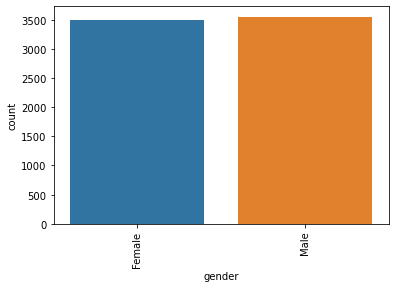

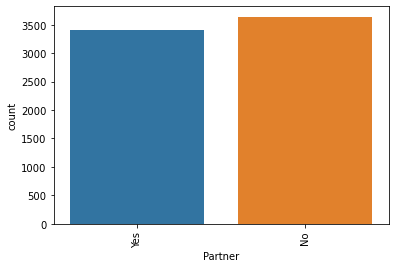

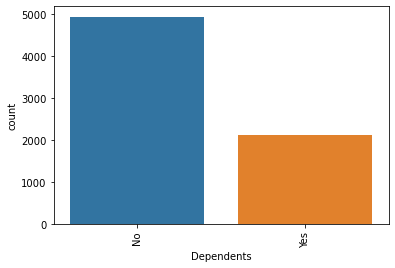

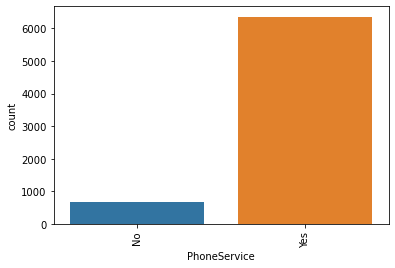

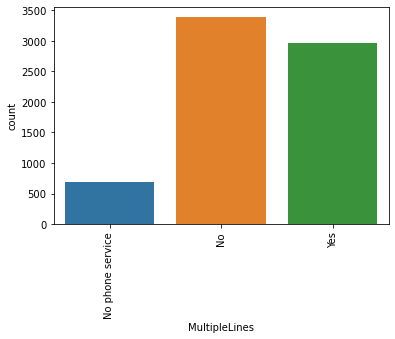

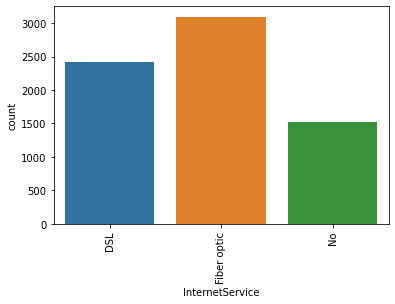

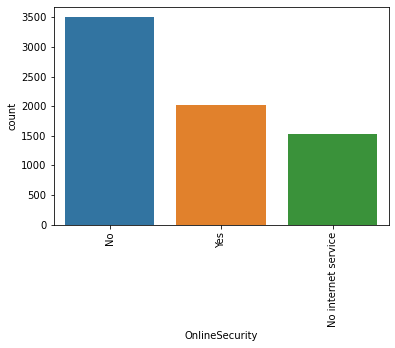

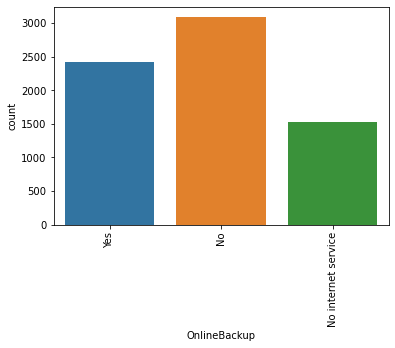

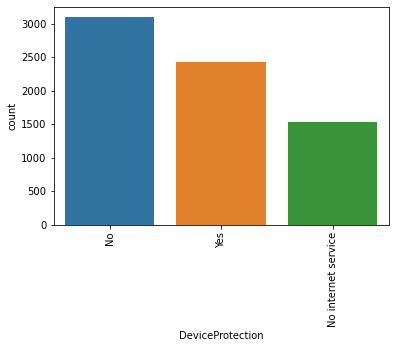

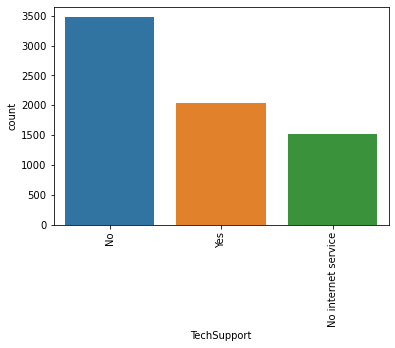

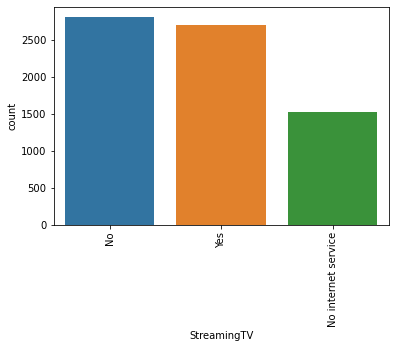

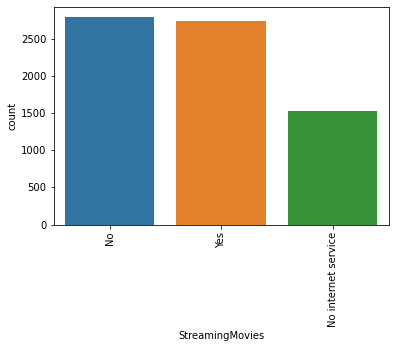

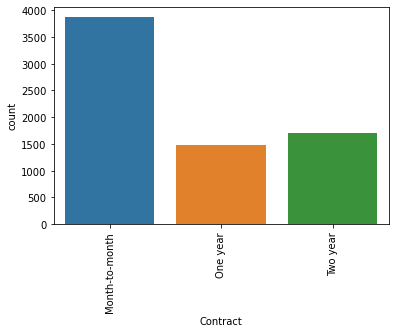

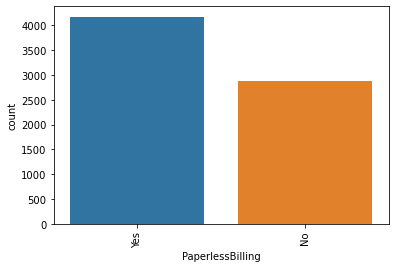

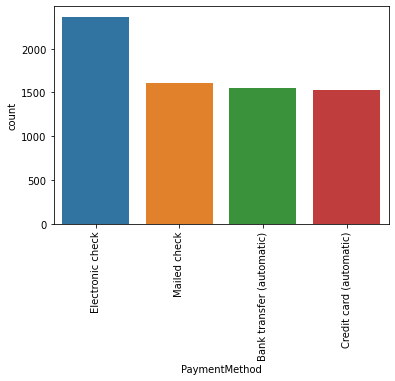

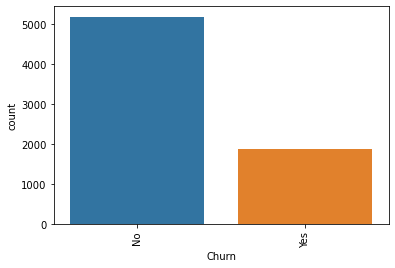

In [37]:
#plotting count plot to see the distribution of customer in categorical columns
for i in df.columns:
    if df[i].dtypes==object:
        sns.countplot(df[i])
        plt.xticks(rotation=90)
        plt.show()

Observations:
    
There are almost equivalent number of male and female in our data set.

Customers with no partners are slighly high in number.

Majority of customers do not have dependents.

Majority of customers have availed phone service.

Most of the customers have not opted for multiple lines.

Internet services are provided via fiber optic to most of the customers.

Most of the customers have not opted for online security, online backup, device protection and tech support.

Customers those who have selected TV streaming are also streaming movies.

Majority of customers have month-to-month contract.

More customers have opted for paperless billing.

Customers prefer to pay via electronic check.

Approx 70% of customers do not churn.



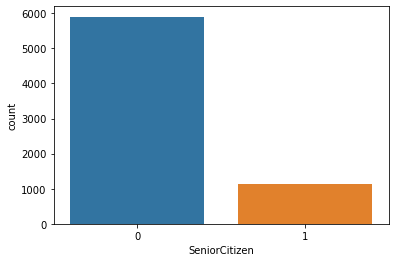

In [38]:
sns.countplot(df['SeniorCitizen'])

Majority of customers are not senior citizens.

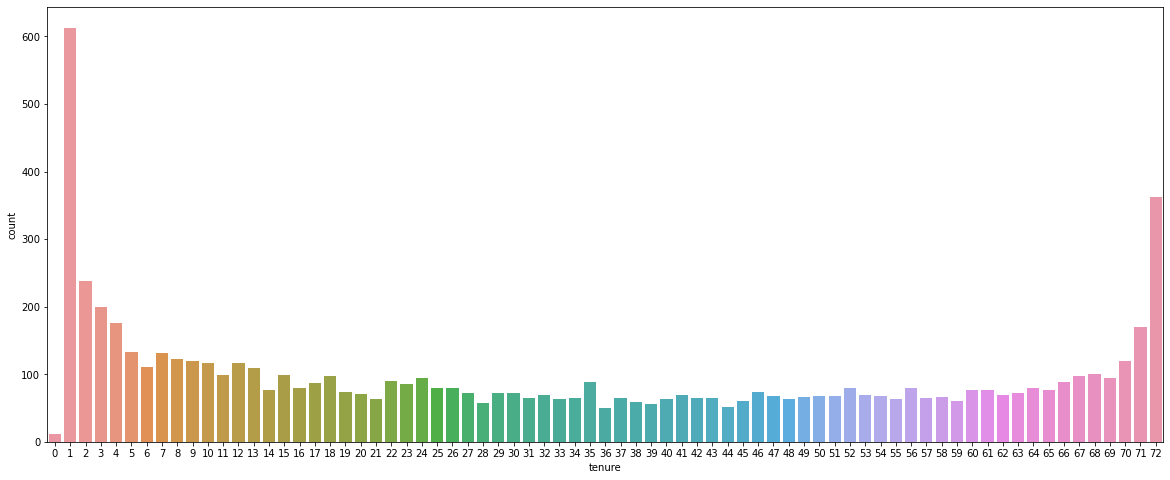

In [39]:
#Visualising numerical columns
plt.figure(figsize=(20,8))
sns.countplot(df['tenure'])
plt.show()

Most of the customers are with the company with a tenure of 1 month as we have seen in above observations that majority of customers have month-to-month contract.

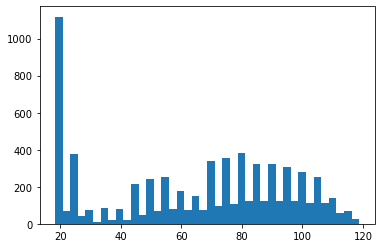

In [40]:
plt.hist(df['MonthlyCharges'],bins=40)
plt.show()

Majority of customers have selected for plan having low monthly charges (between 18-20).

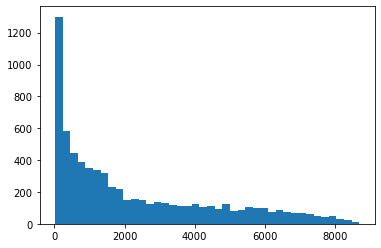

In [41]:
plt.hist(df['TotalCharges'],bins=40)
plt.show()

As most of the customers have month-to-month contract therfore the total charges are also same as monthly charges for those customers. Skewness is present in total charges.

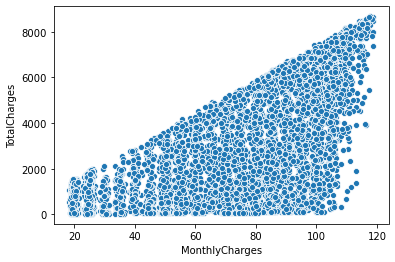

In [42]:
#Lets see relation between monthly and total charges
sns.scatterplot(df['MonthlyCharges'],df['TotalCharges'])
plt.show()

Total charges increases with increase in monthly charges.

In [43]:
a=df['Contract'].unique()

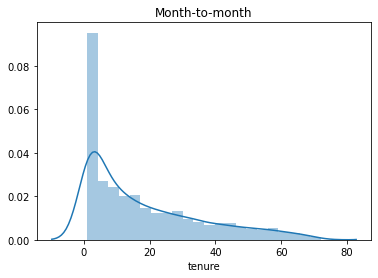

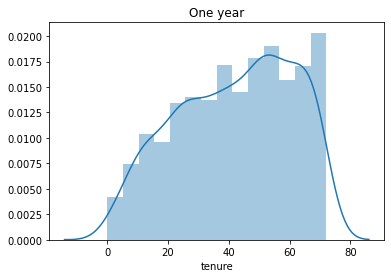

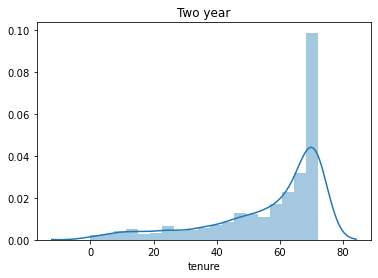

In [44]:
#Contract with tenure of the customer with the company
for i in a:
    sns.distplot(df[df['Contract']==i]['tenure'])
    plt.title(i)
    plt.show()

Customer with month-to-month contract have a tenure of 1-2 months only and customers with two year contract are with the company with a tenure of 70-72 months.
It shows that customers having 2 year contract are more likely not to switch to another company.

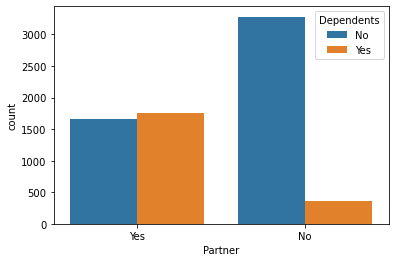

In [45]:
#partner vs dependents
sns.countplot(df['Partner'],hue=df['Dependents'])

Almost half of the customers with a partner have dependents

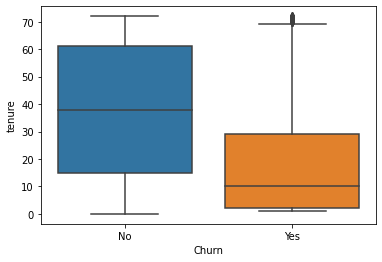

In [46]:
#Lets check customer churn with other independent variables
sns.boxplot(df['Churn'],df['tenure'])

Customer who do not churn have a long tenure with the company.

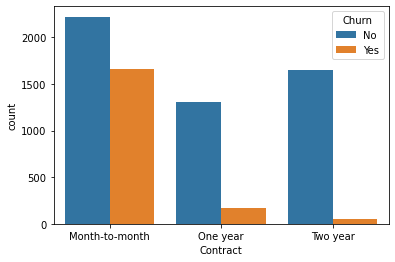

In [47]:
sns.countplot(df['Contract'],hue=df['Churn'])

Customer having month-to-month contract are likely to churn more than customers having 1 or 2 year contract. 

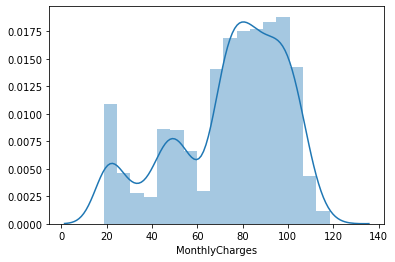

In [48]:
#Monthly charges vs churning of customer
sns.distplot(df['MonthlyCharges'][df['Churn']=='Yes'])
plt.show()

Customer churn rates are high when monthly charges are high.

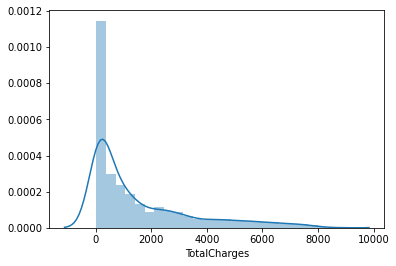

In [49]:
#Total charges vs churn
sns.distplot(df['TotalCharges'][df['Churn']=='Yes'])
plt.show()

Customer churn rate is high when the total charges are low.

In [50]:
#Describing the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Observations:

Tenure ranges from 0 to 72 months.

Minimum monthly charge is 18.25 and maximum is 118.75.

Minimum total charges are 18.80 and maximum is 8684.80.


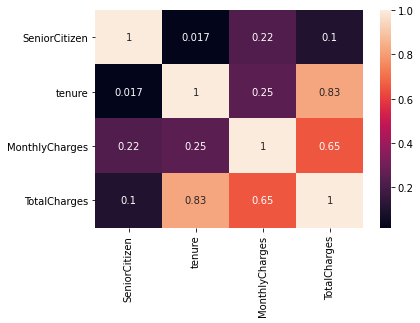

In [51]:
#Checking correlation
sns.heatmap(df.corr(),annot=True)
plt.show()

Observations:

Tenure is strongly correlated with total charges.

Monthly charges and total charges are positively correlated.

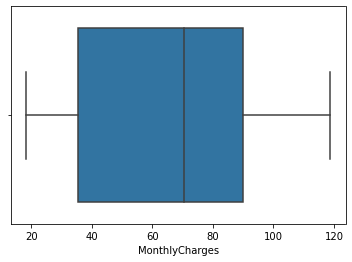

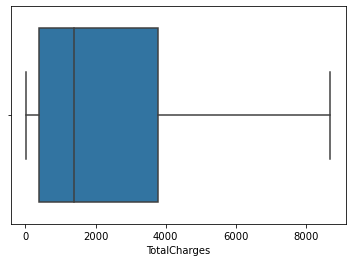

In [52]:
#Checking outliers
col=['MonthlyCharges','TotalCharges']
for i in col:
    sns.boxplot(df[i])
    plt.show()

There are no outliers in our dataset.

In [53]:
#Checking skewness
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
dtype: float64

Keeping +/- 0.5 as the range for skewness, total charges contains skewness.

In [54]:
#Removing skewness
df['TotalCharges']=np.cbrt(df['TotalCharges'])

In [55]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.012996
dtype: float64

In [56]:
#Converting object data type columns to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes==object:
        df[i] = le.fit_transform(df[i])
        

In [57]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,3.102045,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,12.362766,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,4.764407,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,12.255516,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,5.332704,1


In [58]:
#Separating independent and target variable
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [59]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,3.102045
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,12.362766
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,4.764407
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,12.255516
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,5.332704


In [60]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [61]:
#Applying min-max scler to bring the variables to a standard scale
from sklearn.preprocessing import MinMaxScaler
col_name=x.columns.values
sc=MinMaxScaler(feature_range = (0,1))
sc.fit(x)
x=pd.DataFrame(sc.transform(x))
x.columns=col_name

In [62]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.024756
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.542227
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.117646
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.536234
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.149401


In [63]:
x.shape,y.shape

((7043, 19), (7043,))

# Finding the best random state:

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is',maxacc,'on random state', maxrs)

Best accuracy is 0.8263132986275438 on random state 129


In [65]:
#spliting train and test data at random state 129
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=129)

In [66]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4930, 19), (2113, 19), (4930,), (2113,))

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [68]:
lr=LogisticRegression()
gnb=GaussianNB()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()

In [69]:
model=[lr,gnb,rf,ada,knn,dtc,svc]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score:',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m, x, y, cv=5)
    print('Cross Validation Score:',score.mean())
    print('auc score:',roc_auc_score(y_test,pred))
    print('\n')

accuracy score: LogisticRegression()
0.8263132986275438
[[1450  127]
 [ 240  296]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1577
           1       0.70      0.55      0.62       536

    accuracy                           0.83      2113
   macro avg       0.78      0.74      0.75      2113
weighted avg       0.82      0.83      0.82      2113

Cross Validation Score: 0.8059067318859281
auc score: 0.7358530745132927


accuracy score: GaussianNB()
0.7628963558920966
[[1231  346]
 [ 155  381]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1577
           1       0.52      0.71      0.60       536

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.80      0.76      0.77      2113

Cross Validation Score: 0.7550770412607266
auc score: 0.7457084820034261


accuracy score: RandomForestClassifier

The best model is GaussianNB() because the recall is higher in this model than other models and auc score is also highest amongst other models.
Recall is important in this case becasue predicting a false negative(if a customer is going to switch the company and our model predicts that he will not switch) then we will loose that customer.

The accuracy is 76% , cross validation score is 75% and auc score is 74%.

# Hyper parameter tuning:

In [70]:
from sklearn.model_selection import GridSearchCV
parameters={'var_smoothing': np.logspace(0,-9, num=100)}
GCV=GridSearchCV(gnb,parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [71]:
#Lets check the best parameters
GCV.best_params_

{'var_smoothing': 1.0}

In [72]:
predgcv=GCV.best_estimator_.predict(x_test)

In [73]:
print('accuracy score:')
print(accuracy_score(y_test,predgcv))
print(confusion_matrix(y_test,predgcv))
print(classification_report(y_test,predgcv))
score=cross_val_score(GCV.best_estimator_, x, y, cv=5)
print('Cross Validation Score:',score.mean())
print('auc score:',roc_auc_score(y_test,predgcv))

accuracy score:
0.7827733080927591
[[1317  260]
 [ 199  337]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1577
           1       0.56      0.63      0.59       536

    accuracy                           0.78      2113
   macro avg       0.72      0.73      0.72      2113
weighted avg       0.79      0.78      0.79      2113

Cross Validation Score: 0.7726827134008646
auc score: 0.731930668471214


Here the accuracy score is improved but recall is reduced, therefore we will go with the default parameters.

In [74]:
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print('accuracy score:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
score=cross_val_score(m, x, y, cv=5)
print('Cross Validation Score:',score.mean())
print('auc score:',roc_auc_score(y_test,pred))

accuracy score:
0.7628963558920966
[[1231  346]
 [ 155  381]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1577
           1       0.52      0.71      0.60       536

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.80      0.76      0.77      2113

Cross Validation Score: 0.7990925825859733
auc score: 0.7457084820034261


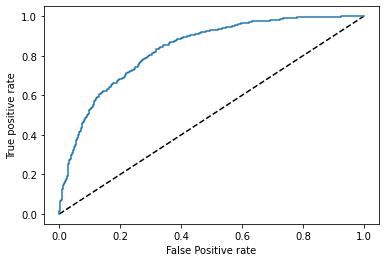

In [75]:
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gaussian NB')
plt.xlabel('False Positive rate')
plt.ylabel('True positive rate')
plt.show()

we have our final model with accuracy of 76%, cross validation score of 79%, auc score of 74% and recall of 71% for customer churn.

In [76]:
#Saving the model
import joblib
joblib.dump(gnb,'telecom_customer_churn_gnb.obj')


['telecom_customer_churn_gnb.obj']